[View in Colaboratory](https://colab.research.google.com/github/isaacyaf/example/blob/master/MNIST_KerasCNN_v0_5.ipynb)

# The Fashion MNIST
# Part 1:
* Import the Libraries
* Set the Parameters
* Set the Functions
* Show the Samples

In [1]:
import tensorflow as tf
print (tf.__version__)
print(tf.test.gpu_device_name())

import numpy as np
np.random.seed(1234)  # for reproducibility (with others results)

from keras.datasets import mnist
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline
import random as ran
from google.colab import files
from PIL import Image

1.7.0
/device:GPU:0


Using TensorFlow backend.


In [8]:
batch_size = 128
nb_classes = 10
#the number of epochs to train the model
nb_epoch = 10

#MNIST
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Fashion_MNIST
#0  T-shirt/top (T恤/上衣)
#1	Trouser 褲子
#2	Pullover	帽T
#3	Dress	連衣裙
#4	Coat	外套
#5	Sandal	涼鞋
#6	Shirt	襯衫
#7	Sneaker	運動鞋
#8	Bag	背包
#9	Ankle boot	短靴
fashion_labellist=[
  "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"
]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#ormalized the image data 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
def display_train_digit(num):
    print(Y_train[num, :])
    
    # 28 by 28 matrix
    image = X_train[num].reshape([28,28]) 
    
    # Label
    label = Y_train[num, :].argmax(axis=0)
    
    plt.title('Example: {0}  Label: {1}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
def display_train_fashion(num):
    print(Y_train[num, :])

    # 28 by 28 matrix
    image = X_train[num].reshape([28,28]) 
    
    # Label
    label = fashion_labellist[int(Y_train[num, :].argmax(axis=0))]
    
    plt.title('Example: {0}  Label: {1}'.format(num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
def display_comparefashion_test(num):
    # prediction result as integer
    our_image=X_test[num].reshape(1,28,28,1)
    label = fashion_labellist[int(Y_test[num, :].argmax(axis=0))]
    
    prediction = fashion_labellist[int(model.predict_classes(our_image))]
    plt.title('Test Sample:{0}, Label: {1}, Prediction: {2}'.
              format(num, label, prediction))
    plt.imshow(our_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_comparewriter(our_image):
    # prediction result as integer
    our_image=our_image.reshape(1,28,28,1)
    prediction = model.predict_classes(our_image)
    plt.title('Prediction: {0}'.format(prediction))
    plt.imshow(our_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()
    
def upload_files():
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


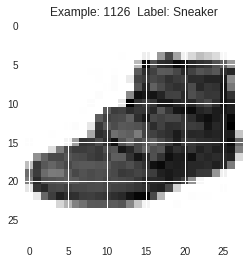

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


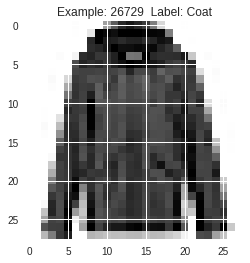

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


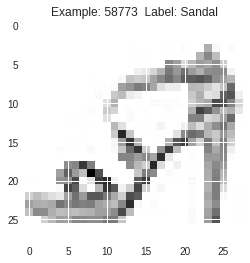

In [4]:
#Show the Samples
display_train_fashion(ran.randint(0, X_train.shape[0]))
display_train_fashion(ran.randint(0, X_train.shape[0]))
display_train_fashion(ran.randint(0, X_train.shape[0]))

# Part 2:
* Creat the Deep Learning Model
* Model Training

In [0]:
def creat_CNN():
  model = Sequential()
  # 1st CN layer
  model.add(Conv2D(filters=32,  
                   kernel_size=(5,5),  
                   padding='same',  
                   input_shape=(28,28,1),  
                   activation='relu')) 
  # 1st Max-pooling layer
  model.add(MaxPooling2D(pool_size=(2,2))) 

  # 2nd CN layer
  model.add(Conv2D(filters=64,  
                   kernel_size=(5,5),  
                   padding='same',  
                   input_shape=(28,28,1),  
                   activation='relu')) 
  # 2nd Max-pooling layer 
  model.add(MaxPooling2D(pool_size=(2,2))) 
  # Dropout layer  
  model.add(Dropout(0.25)) 

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  #softmax layer
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  return model


In [6]:

model=creat_CNN()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
__________

In [9]:
#Training

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.5671 - acc: 0.7971 - val_loss: 0.3543 - val_acc: 0.8706
Epoch 2/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.3525 - acc: 0.8748 - val_loss: 0.3308 - val_acc: 0.8824
Epoch 3/10
29312/60000 [=============>................] - ETA: 4s - loss: 0.3075 - acc: 0.8907

60000/60000 [==============================] - 9s 149us/step - loss: 0.3040 - acc: 0.8923 - val_loss: 0.2720 - val_acc: 0.9012
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2762 - acc: 0.9022 - val_loss: 0.2713 - val_acc: 0.8978
Epoch 5/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2573 - acc: 0.9086 - val_loss: 0.2771 - val_acc: 0.9067
Epoch 6/10
 1280/60000 [..............................] - ETA: 8s - loss: 0.2534 - acc: 0.9094

60000/60000 [==============================] - 9s 148us/step - loss: 0.2476 - acc: 0.9140 - val_loss: 0.2550 - val_acc: 0.9068
Epoch 7/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2363 - acc: 0.9160 - val_loss: 0.2618 - val_acc: 0.9005
Epoch 8/10
56448/60000 [===========================>..] - ETA: 0s - loss: 0.2297 - acc: 0.9199

60000/60000 [==============================] - 9s 147us/step - loss: 0.2304 - acc: 0.9194 - val_loss: 0.2380 - val_acc: 0.9125
Epoch 9/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.2224 - acc: 0.9217 - val_loss: 0.2743 - val_acc: 0.9119
Epoch 10/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.2193 - acc: 0.9245 - val_loss: 0.2596 - val_acc: 0.9134
Test score: 0.259628196837008
Test accuracy: 0.9134


# Part 3:
* Save & Load your Model
* Verify your Model


In [12]:
#Save the Model
model.save('my_FM_CNNmodel.h5')

#Load the Model
model = load_model('my_FM_CNNmodel.h5')

datalab  my_CNNmodel.h5  my_FM_CNNmodel.h5


In [0]:
files.download("my_FM_CNNmodel.h5") 

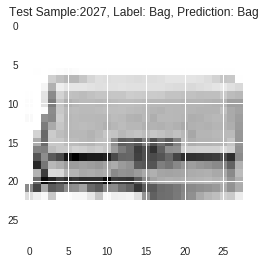

In [13]:
#Verify your model

ranpick=ran.randint(0, X_test.shape[0])
display_comparefashion_test(ranpick)

# The MNIST
# Part 4:
* Load the MNIST Data
* Model Training
* Write & Upload your MNIST Data
* Verify & Show your MNIST Data


The Test Data: ![Sample](https://imgur.com/entWh6E.png)


In [14]:
#MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#ormalized the image data 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')  
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')  
X_train /= 255
X_test /= 255


# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [0]:
batch_size = 64
nb_classes = 10
#the number of epochs to train the model
nb_epoch = 10


In [16]:
model=creat_CNN()
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
__________

In [17]:
#Training
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.1891 - acc: 0.9416 - val_loss: 0.0500 - val_acc: 0.9826
Epoch 2/10
55488/60000 [==========================>...] - ETA: 1s - loss: 0.0687 - acc: 0.9802

60000/60000 [==============================] - 16s 260us/step - loss: 0.0689 - acc: 0.9802 - val_loss: 0.0327 - val_acc: 0.9902
Epoch 3/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0525 - acc: 0.9849 - val_loss: 0.0409 - val_acc: 0.9874
Epoch 4/10
29568/60000 [=============>................] - ETA: 7s - loss: 0.0443 - acc: 0.9881

60000/60000 [==============================] - 15s 257us/step - loss: 0.0473 - acc: 0.9868 - val_loss: 0.0290 - val_acc: 0.9905
Epoch 5/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0458 - acc: 0.9874 - val_loss: 0.0353 - val_acc: 0.9906
Epoch 6/10
23296/60000 [==========>...................] - ETA: 8s - loss: 0.0433 - acc: 0.9877

60000/60000 [==============================] - 15s 257us/step - loss: 0.0475 - acc: 0.9866 - val_loss: 0.0294 - val_acc: 0.9922
Epoch 7/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0486 - acc: 0.9868 - val_loss: 0.0727 - val_acc: 0.9875
Epoch 8/10
21952/60000 [=========>....................] - ETA: 9s - loss: 0.0515 - acc: 0.9866

60000/60000 [==============================] - 15s 258us/step - loss: 0.0519 - acc: 0.9864 - val_loss: 0.0309 - val_acc: 0.9917
Epoch 9/10
60000/60000 [==============================] - 16s 258us/step - loss: 0.0515 - acc: 0.9859 - val_loss: 0.0326 - val_acc: 0.9913
Epoch 10/10
20672/60000 [=========>....................] - ETA: 9s - loss: 0.0504 - acc: 0.9866

60000/60000 [==============================] - 15s 258us/step - loss: 0.0540 - acc: 0.9867 - val_loss: 0.0340 - val_acc: 0.9914
Test score: 0.03398095806657657
Test accuracy: 0.9914


In [28]:
#Upload your data
upload_files()

Saving test.bmp to test (1).bmp


['test.bmp']

In [0]:
#Open the data you wrote
im = Image.open("test.bmp")

#normalized
im = im.convert('1')
writetmp=np.array(im.getdata())
writetmp=(255-writetmp)/255



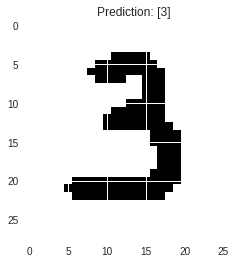

In [95]:
display_comparewriter(writetmp)